## Multiple Linear Regression:

- one dependent variable and multiple independent variables.
- y = b0 + b1x1 + b2x2 ....... + nnxn
- price of the house

## Process using sklearn :

- Read the data
- Cleaning/ analyzing
- Seperate the features and target
- Train/ test the data
- Select the required model
- fit our training data
- predict 

In [1]:
# Reading the data
import pandas as pd

data = pd.read_csv("FuelConsumptionCo2.csv")

In [2]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
data.shape

(1067, 13)

In [4]:
data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [5]:
data['MODELYEAR'].value_counts()

2014    1067
Name: MODELYEAR, dtype: int64

In [6]:
x = data[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
y = data['CO2EMISSIONS']


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_train

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
554,15.7,10.3,13.3
1053,11.7,9.4,10.7
675,12.7,9.1,11.1
536,14.5,9.5,12.3
264,21.5,14.6,18.4
...,...,...,...
1040,7.9,5.7,6.9
892,12.2,8.1,10.4
434,17.1,12.7,15.1
925,20.7,12.8,17.1


In [8]:
x_test.shape

(321, 3)

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(x_test)
y_pred

array([332.73033081, 243.00421946, 321.49422854, 135.97669133,
       213.04052928, 296.64698291, 201.30675904, 297.86162126,
       257.36068477, 189.47239479, 369.37581947, 245.47996214,
       204.80372167, 234.47339946, 338.91446132, 211.03421057,
       289.18374127, 244.07190541, 248.95881037, 222.91493321,
       238.63309686, 221.10203289, 400.63673519, 366.13674802,
       240.44599718, 296.64698291, 209.96652462, 191.22082231,
       438.5149766 , 256.22863363, 367.28691357, 270.86099694,
       188.61624164, 334.20286034, 252.00446343, 195.86795049,
       276.23533268, 261.34507819, 307.94755798, 251.38808706,
       312.02466819, 220.29223813, 247.22838966, 280.99329205,
       232.44896636, 419.64032869, 307.86497078, 181.15299999,
       219.03124139, 209.36826265, 235.798869  , 286.49657339,
       281.60966843, 286.49657339, 296.64698291, 388.81260814,
       283.76304713, 261.39143658, 222.44561683, 217.68765746,
       223.0619932 , 184.71443542, 256.01710084, 232.44

In [11]:
model.predict([[6.0, 5.8, 5.9]])  # values of 2nd row

array([155.44960121])

In [12]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, y_pred)*100

82.75562967199109

In [17]:
mean_squared_error(y_test, y_pred)**0.5

25.679304365500215

In [18]:
model.intercept_

74.77009222621581

In [19]:
model.coef_

array([ 8.74267559, -5.33789174, 10.03105551])

## Polynomial Regression:

In [1]:
import pandas as pd
df = pd.read_csv('china_gdp.csv')

In [2]:
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [4]:
df.shape

(55, 2)

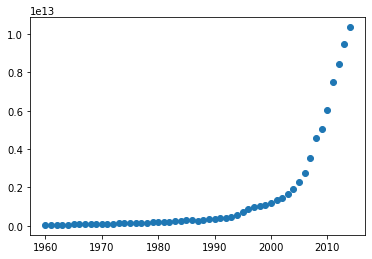

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df['Year'], df['Value'])
plt.show()

In [11]:
x = df['Year'].values.reshape(-1, 1)
y = df['Value']

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(x)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

In [14]:
y_pred = model.predict(x_poly)

In [17]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y, y_pred)*100

96.45101047000898

In [18]:
mean_squared_error(y, y_pred)

2.177936487194082e+23

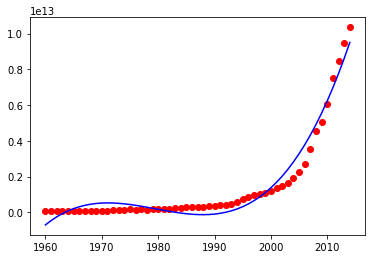

In [21]:
plt.scatter(df['Year'], df['Value'], c = 'red')
plt.plot(x, y_pred, c = 'blue')
plt.show()

In [23]:
acc = []
for i in range(2, 20) :
    poly = PolynomialFeatures(degree = i)
    x_poly = poly.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)
    acc.append(r2_score(y, y_pred)*100)

In [24]:
acc

[84.24443474171446,
 96.45101047000898,
 96.5120230215125,
 96.57218086535269,
 96.63149021194226,
 96.68995728675763,
 96.74758835356721,
 96.80438971170584,
 96.86036769344585,
 96.9155286654676,
 96.96987902292203,
 97.02342519173827,
 97.07617362685119,
 97.12813080732198,
 97.17930323901378,
 97.22969745112273,
 97.27931999533536,
 97.32817744349673]

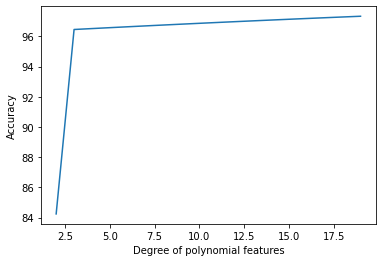

In [29]:
import numpy as np

plt.plot(np.arange(2, 20), acc)
plt.xlabel("Degree of polynomial features")
plt.ylabel("Accuracy")
plt.show()